  MLP WITH KERAS

Building image classifier using sequential API


1.Loading the data from Fashion MNSIT

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(x_train, y_train), (x_test, y_test) = fashion_mnist
x_train,y_train = x_train[:-7000],y_train[:-7000]
x_valid,y_valid = x_train[-7000:],y_train[-7000:]


In [3]:
x_train.shape,x_train.dtype

((53000, 28, 28), dtype('uint8'))

In [4]:
x_train,x_test,x_valid = x_train/255.0,x_test/255.0,x_valid/255.0

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Ankle boot'

Building the model 

In [6]:
tf.random.set_seed(42)
model= tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
    
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 10)                2010      
                                                                 
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


Compiling the model

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

Training and evaluating the model

In [9]:
h = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1657/1657 [==============================] - 9s 5ms/step - loss: 0.4821 - accuracy: 0.8271 - val_loss: 0.3881 - val_accuracy: 0.8574
Epoch 2/30
1657/1657 [==============================] - 7s 4ms/step - loss: 0.3673 - accuracy: 0.8647 - val_loss: 0.3270 - val_accuracy: 0.8820
Epoch 3/30
1657/1657 [==============================] - 7s 4ms/step - loss: 0.3276 - accuracy: 0.8780 - val_loss: 0.2873 - val_accuracy: 0.8941
Epoch 4/30
1657/1657 [==============================] - 8s 5ms/step - loss: 0.3014 - accuracy: 0.8891 - val_loss: 0.2850 - val_accuracy: 0.8943
Epoch 5/30
1657/1657 [==============================] - 8s 5ms/step - loss: 0.2849 - accuracy: 0.8940 - val_loss: 0.2731 - val_accuracy: 0.8991
Epoch 6/30
1657/1657 [==============================] - 8s 5ms/step - loss: 0.2721 - accuracy: 0.8986 - val_loss: 0.2459 - val_accuracy: 0.9103
Epoch 7/30
1657/1657 [==============================] - 8s 5ms/step - loss: 0.2557 - accuracy: 0.9029 - val_loss: 0.2622 - val_accuracy:

Plotting the learning curves

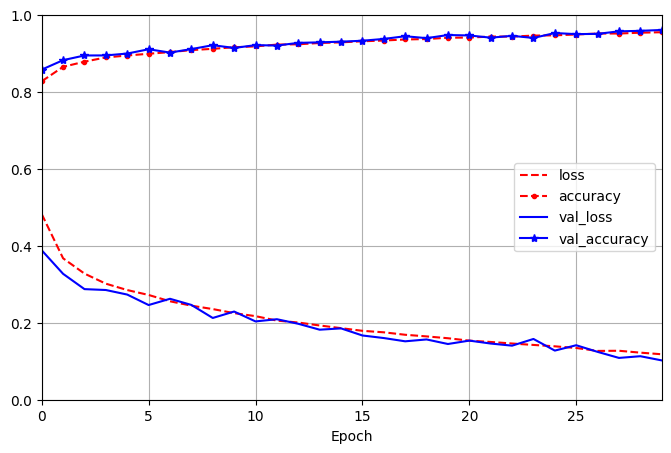

In [10]:
pd.DataFrame(h.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4963 - accuracy: 0.8902


[0.49628570675849915, 0.8902000188827515]

Using the model to make predictions

In [12]:
X_new = x_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 108ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Comparing test_new and y_proba

In [13]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

y predicted

In [14]:
class_names[y_pred[0]], class_names[y_pred[1]], class_names[y_pred[2]]

('Ankle boot', 'Pullover', 'Trouser')

y test

In [15]:
y_new = y_test[:3]
class_names[y_new[0]], class_names[y_new[1]], class_names[y_new[2]]

('Ankle boot', 'Pullover', 'Trouser')

Building another model adding additional layer

In [16]:
tf.random.set_seed(42)
model1= tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
    
])

In [17]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 200)               157000    
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dense_5 (Dense)             (None, 100)               20100     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 218,310
Trainable params: 218,310
Non-trainable params: 0
_________________________________________________________________


In [18]:
model1.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

Training and evaluation 

In [19]:
h1 = model1.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1657/1657 [==============================] - 9s 5ms/step - loss: 0.6229 - accuracy: 0.7906 - val_loss: 0.4370 - val_accuracy: 0.8473
Epoch 2/30
1657/1657 [==============================] - 9s 5ms/step - loss: 0.4214 - accuracy: 0.8517 - val_loss: 0.3846 - val_accuracy: 0.8636
Epoch 3/30
1657/1657 [==============================] - 9s 5ms/step - loss: 0.3785 - accuracy: 0.8660 - val_loss: 0.3469 - val_accuracy: 0.8767
Epoch 4/30
1657/1657 [==============================] - 8s 5ms/step - loss: 0.3530 - accuracy: 0.8742 - val_loss: 0.3320 - val_accuracy: 0.8797
Epoch 5/30
1657/1657 [==============================] - 8s 5ms/step - loss: 0.3318 - accuracy: 0.8811 - val_loss: 0.3122 - val_accuracy: 0.8919
Epoch 6/30
1657/1657 [==============================] - 8s 5ms/step - loss: 0.3165 - accuracy: 0.8853 - val_loss: 0.3063 - val_accuracy: 0.8896
Epoch 7/30
1657/1657 [==============================] - 8s 5ms/step - loss: 0.3011 - accuracy: 0.8907 - val_loss: 0.3028 - val_accuracy:

Plotting learning curves 

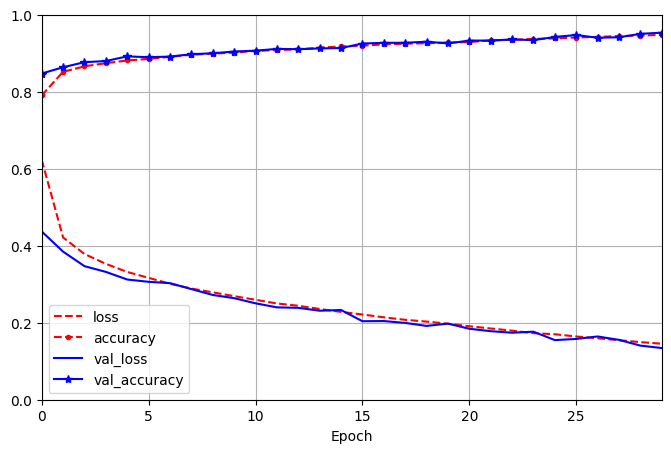

In [20]:
pd.DataFrame(h1.history).plot(
figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [21]:
model1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3490 - accuracy: 0.8890


[0.3489786386489868, 0.8889999985694885]